# <b><u> Discovering Mental Health In Micro Bloggers over tweets using sentiment analysis</u></b>







**Team Members**
<br>
**Name    -  Net ID**

*  Sant, Abhijeet  - ars1125
*  Sanka, Hema Nagasai Anusha  - ns292
*  Shreya, Shreya - ss13337

---

### **Background**:

The outbreak of Corona Virus pandemic is provoking havoc - explosion of viruses
and its variants, millions of lost lives, economic depths of despair and restraints
on human interaction causing perceptible disruption, all over the globe. One such
undesirable outcome is on the psychological health of populace at large. Scientists
& researchers, apprehend the deterioration of mental health caused by COVID
isn’t temporary, and could persist long after the pandemic departs. Suddenly,
innumerable people are suffering from stress, fear, anxiety, trepidation,
hopelessness and ultimately depression. Closely monitoring mental health trends
in real-time, can help people that are disproportionately affected and hence the
study becomes extremely crucial. These trends can also be used to assess and
compute the impact of policies and endeavors that address mental health status.
Microblogging platforms like twitter have come to the fore as a space of trends.
Tweets (twitter posts) are perspectives, views, comments on international,
political, social trends, dispositions, and ongoing issues. They say, “You are what
you Tweet”. Indeed, people are using this platform to unload the burdens of
mental health.
With this notion in mind, following is an analytical study of “Discovering Mental
Health in micro bloggers”.

### **Problem Statement**:

1. Has the mental health of populace in COVID deteriorated?
2. What is the proportion of people experiencing symptoms of anxiety and
depression?
3. Are more people anxious than depressed or vice-versa?
4. With how much certainty can we predict the mental health of a person by
using his history of tweets?

# Pre-requsite modules 
1.   Code below contains all the required modules to run the code




In [1]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 7.7MB/s 


In [58]:
import pandas as pd
from pandas import DataFrame
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
import tweepy as tw
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import numpy as np
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

In [4]:
import nltk
import os
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('all')
lemmatizer = WordNetLemmatizer()
stopword_list = stopwords.words("english")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

# 1. Data Collection : 
For performing sentiment analysis we need training dataset to tune our   model and test data to predict the emotional state of a person from his tweets.
     

1.   Training data : We have collected the tweets (dataset) from twitter api from 2019 - 2021. Saved the data into csv and use it.
2.   Testing data :  We have split the training data set into two - one to train the model the other to test. 



In [5]:
## Following code was used to create tweet dataset
def get_tweets(date_since,search_words):
  '''
    Input: list of dates from which you need tweets and List of search words
    Output: Dataframe of tweets
  '''
  # We need to have the below credentials from an active developer twitter account

  consumer_key =  # <INSERT YOUR CONSUMER KEY HERE>
  consumer_secret = # <INSERT CONSUMER_SECRET>
  access_token = # <INSERT ACCESS_TOKEN>
  access_token_secret = # <INSERT ACCESS_TOKEN_SECRET>

 
  auth = tw.OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_token, access_token_secret)
  api = tw.API(auth, wait_on_rate_limit=True)

  tweets_list = []
  for date in date_since:
    # print(keyword,date)
    for keyword in search_words:
      search_key = keyword+' -filter:retweets'
      tweets = tw.Cursor(api.search,q= search_key,count=1000,lang="en",since=date).items(50)
      # users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
      for tweet in tweets:
        tweets_list.append([tweet.id,tweet.created_at,tweet.user.location,tweet.text] )

  return DataFrame(tweets_list)

In [137]:
## Following got calls the above tweet collection function as it takes lot of time to run this part, we have provided the data obtained using this code (File name - "Final_twitter.csv")

# train_tweets_dates= ["2020-01-01","2020-02-01","2020-03-01","2020-04-01","2020-04-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01","2021-01-01","2021-02-01","2021-03-01","2021-04-01"]
# train_tweets_search_words = ["Depression","hope","Hopeless","Joy","Quarantine","covid-19", "CORONA", "StayHomeStaySafe", "StayHome","life","family","lonely","god","stocks","NBL","IPL","COVID2019","COVID19","pandemic","","Coronavirus","Social distancing","Flatten the curve", "covid-19", "CORONA", "StayHomeStaySafe", "StayHome", "CovidPandemic", "Lockdown", "Qurantine", "Outbreak"]
# train_tweet_data = get_tweets(train_tweets_dates,train_tweets_search_words)
# DataFrame(train_tweet_data).to_csv("Final_twitter.csv")
# train_tweet_data.columns = ["tweet.id","tweet.created_at","tweet.user.location","tweet.text"]

In [7]:
## Function into import the  dataset
def import_data(file_path):
  '''
    Input: File path of data set
    Output: Dataframe of csv data 
  '''
  train_data = pd.read_csv(file_path)
  return train_data


In [74]:
url = "https://raw.githubusercontent.com/Shreya2012/data_bootcamp_final_project/main/Final_twitter.csv"
train_tweet_data = import_data(url).drop(columns=['Unnamed: 0'])
train_tweet_data = train_tweet_data.drop(columns=['index'])
train_tweet_data

,tweet.id,tweet.created_at,tweet.user.location,tweet.text
0,48751,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
1,48752,16-03-2020,UK,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2,48753,16-03-2020,Vagabonds,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P"
3,48754,16-03-2020,NaN,"My food stock is not the only one which is empty...\n\n\n\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \n\nStay calm, stay safe.\n\n\n\n#COVI..."
4,48755,16-03-2020,NaN,"Me, ready to go at supermarket during the #COVID19 outbreak.\n\n\n\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't p..."
...,...,...,...,...
44950,48746,16-03-2019,Israel ??,RT @aliahmed_ppp: Happy birthday to the poet of the east 💓\n#IqbalDay2020 https://t.co/7WPDiGtx9x
44951,48747,16-03-2019,"Farmington, NM",RT @sanditonlovebot: @MariannS18 Happy birthday!! 🎉❤️ #Sanditon #SaveSanditon #SanditonPBS
44952,48748,16-03-2019,"Haverford, PA",YOOOO ITS CORYS BIRTHDAY HAPPY BIRTHDAY TO THE ANKLE BREAKER HIMSELF
44953,48749,16-03-2019,NaN,"RT @CoryxKenshin: Thank you all for all the birthday wishes, really made ya boy feel loved today 🎉 https://t.co/ns5V3ZEZHb"


# 2. Data Analysis (EDA):

---
### **Research**
The approach for this study includes the use of twitter as the principal source of
information for thoughts, comments, and views in the form of tweets. The python
library, Tweepy has been employed for data extraction from twitter API. Vader
algorithm is applicable to further classify tweets under sentiment polarity and
intensity. Regex and NLP techniques have been used for text and data analysis
including removal of https/urls/punctuations/numbers from tweets and
tokenization and stemming procedures for maximum results. Decision Tree, 
Random Forest, Support Vector Machine and Logistic regression are the
attempted machine learning models.

---

Agenda of this section is to understand the data distribution and variety. This analysis will help us in next step of data cleaning for accurate predictions.


1.   Non-visual analysis
  1.   Getting dimensions,data types and null values of the dataset
  2.   Getting data types and null values
  3.   Understanding the data distribution and outliners of float columns
  4.   Categorial variables

2.   Visual analysis
  1.   Word cloud of unprocessed tweets.
  2.   Heat map of null values in each column


In [75]:
## Getting dimensions of the dataset
def get_dimensions(df):
  print("-"*50,"\n")
  print("No of rows and columns: ", df.shape)
  print("-"*50,"\n")

## Getting data types of columns oin the dataset
def get_data_types(df):
  print("-"*50,"\n")
  print("Data types of columns: ", df.info())
  print("-"*50,"\n")

## Understanding the data distribution nad outliners of float columns
def get_describe(df):
  print("-"*50,"\n")
  print("Data distribution: ",df.describe())
  print("-"*50,"\n")

## Count of null rows in each column
def check_null(df):
  print("-"*50,"\n")
  print("Null values:\n",df.isnull().sum(axis = 0))
  print("-"*50,"\n")

## Value count of unique values in tweets - location and id
def get_value_count(df):
  print("-"*50,"\n")
  print("\n","Value count of unique location", df['tweet.user.location'].value_counts())
  print("-"*50,"\n")
  print("-"*50,"\n")
  print("Value count of unique id:", df['tweet.id'].value_counts())
  print("-"*50,"\n")

In [76]:
def word_frequency_chart(data):
  '''
    Input : Tweet data
    Ouput : None
    Console output - bar chart
  '''
  # Frequently used words
  unique_words = []
  words_list = []
  for tweet in data:
    word_list = tweet.split(" ")
    unique_words = unique_words + word_list
    words_list = words_list + word_list
    unique_words = list(set(unique_words))

  unique_word_count = []
  for word in unique_words:
    unique_word_count.append([word, words_list.count(word)])
  unique_word_count = unique_word_count[3:]
  unique_word_count = pd.DataFrame(unique_word_count, columns = ['word', 'count'])
  unique_word_count = unique_word_count.sort_values(by =["count"],ascending= False)
  print(unique_word_count.head(10))
 

Call the Functions

In [77]:
get_dimensions(train_tweet_data)

-------------------------------------------------- 

No of rows and columns:  (44955, 4)
-------------------------------------------------- 



In [78]:
get_data_types(train_tweet_data)

-------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet.id             44955 non-null  int64 
 1   tweet.created_at     44955 non-null  object
 2   tweet.user.location  35526 non-null  object
 3   tweet.text           44955 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
Data types of columns:  None
-------------------------------------------------- 



In [79]:
get_describe(train_tweet_data)

-------------------------------------------------- 

Data distribution:             tweet.id
count  44955.000000
mean   67430.000000
std    12977.535012
min    44953.000000
25%    56191.500000
50%    67430.000000
75%    78668.500000
max    89907.000000
-------------------------------------------------- 



In [80]:
check_null(train_tweet_data)

-------------------------------------------------- 

Null values:
 tweet.id                  0
tweet.created_at          0
tweet.user.location    9429
tweet.text                0
dtype: int64
-------------------------------------------------- 



In [81]:
get_value_count(train_tweet_data)

-------------------------------------------------- 


 Value count of unique location United States              605
London                     581
London, England            568
New York, NY               429
Washington, DC             411
                          ... 
Probably in the kitchen      1
Clermont, FL                 1
Brooklyn, NY, USA            1
Crawley, South East          1
the Interwebz                1
Name: tweet.user.location, Length: 12881, dtype: int64
-------------------------------------------------- 

-------------------------------------------------- 

Value count of unique id: 67583    1
73033    1
56657    1
54608    1
77135    1
        ..
86687    1
88734    1
82589    1
84636    1
65536    1
Name: tweet.id, Length: 44955, dtype: int64
-------------------------------------------------- 



## Observation of Non visual EDA:
1.   Only User id is a numeric value in the dataset. Hence the we can skip trying to find the outliers in the column as id is unique and represents individual persons.

2.  Created at, user location and tweet are objects - this information was used to dig deep into the value of location and user id. This can give us a greater picture of infering the demographic statistics after completing the analysis.

3.  We saw location column had multiple null values, but we have decided not to clean that as we may lose the user tweet data which in our case plays cruical role. 

4. Frequecy of top 10 words show the most used words. From the result we see most of them are atop words which needs to be removed as part of cleaning for precise prediction.



In [82]:
def create_cloud(df):
  '''
    Input : Tweet data set
    Output : None
    Console output - word cloud
  '''

  all_words = ' '.join([text for text in df])
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

In [83]:
def heat_map_null_values(data):
  '''
    Input : tweet data set
    Output : None
    Console output - heat map
  '''
  # Heat Map for missing values
  plt.figure(figsize=(17, 5))
  sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
  plt.xlabel("Column_Name", size=14, weight="bold")
  plt.title("Places of missing values in column",fontweight="bold",size=17)
  plt.show()

In [84]:
def unique_word_count_chart(data):
  '''
    Input : tweet data
    Ouput : None
    Console output - bar graph of unique words
  '''
  # Unique Values In Each Feature Coulmn
  unique_df = pd.DataFrame()
  unique_df['Features'] = data.columns
  unique=[]
  for i in data.columns:
      unique.append(data[i].nunique())
  unique_df['Uniques'] = unique

  f, ax = plt.subplots(1,1, figsize=(15,7))

  splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
  for p in splot.patches:
      splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                    va = 'center', xytext = (0, 9), textcoords = 'offset points')
  plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
  plt.ylabel('#Unique values', size=12, weight='bold')
  plt.xlabel('Features', size=12, weight='bold')
  plt.xticks(rotation=90)
  plt.show()

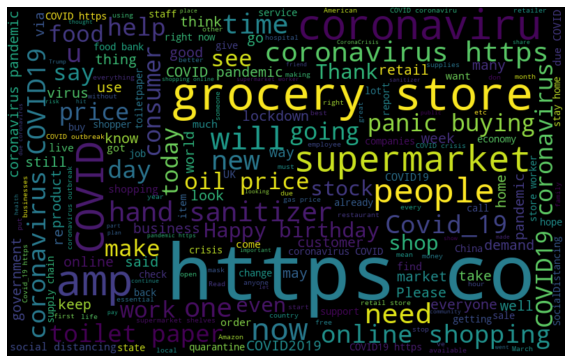

In [85]:
# Word Cloud of uncleaned tweets
create_cloud(train_tweet_data["tweet.text"])

The word cloud clearly captures the social disorder by the pandemic. The words like social distancing, grocery store, toilet paper and hand sanitizer were trending not only during 2020 but even in 2021.

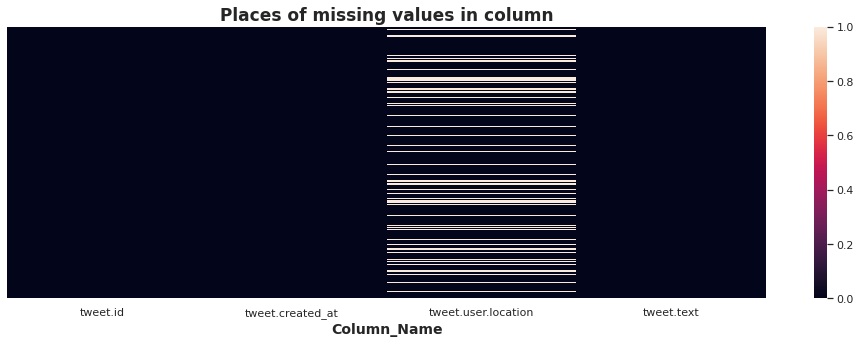

In [86]:
# Null value Heat map 
heat_map_null_values(train_tweet_data)

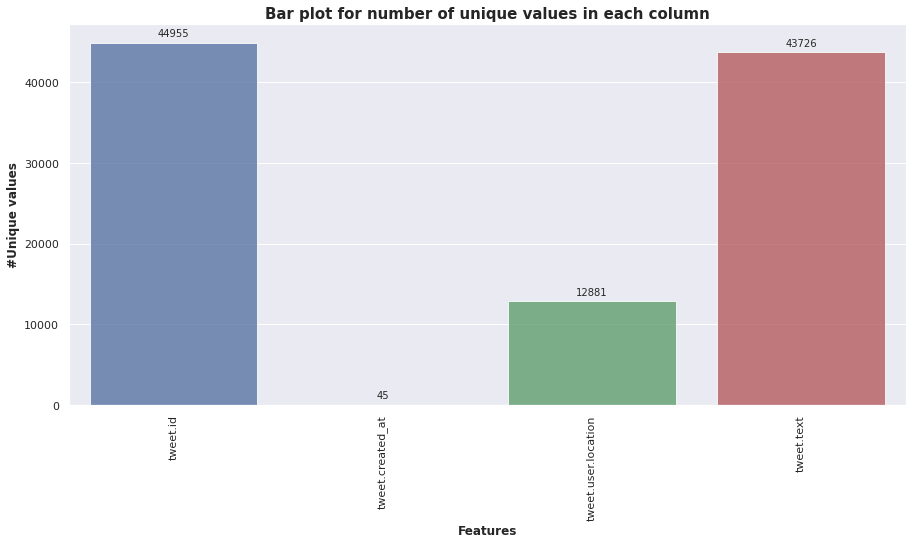

In [87]:
unique_word_count_chart(train_tweet_data)

## Observation of visual EDA:
1.   From word cloud we can see that there are many words like https, CO, US which doesnt convey any emotion - This leads us to remove the stop words for deducing the relavent words.

2. From the heat map we can see there are no null values in any other column other than location.




# 3. Data Cleaning and Processing:
  1.   Clean the tweets - remove punctations, stop words, URL and special characters.
  3. Lemmetization & Stemming





In [23]:
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()).lower())


def clean_post(post):
    '''
      Input : text
      Ouput : lemmatized text with removed stop words
    ''' 
    global stopword_list, lemmatizer         
    post_tokens = word_tokenize(post)
    filtered_tokens = [token for token in post_tokens if token not in stopword_list]
    lemmas = [lemmatizer.lemmatize(token, pos='v') for token in filtered_tokens]
    return " ".join(lemmas)


def cleantweets(tweets_list):
  '''
    Input : tweet list
    Ouput : cleaned tweets 
  '''
  # Clean the tweets - remove punctations, stop words, URL and special characters. 
  cleaned_tweet = []
  for tweet in tweets_list:
    cleaned_tweet.append(clean_tweet(tweet))

  # Lemmetization & Stemming of tweets
  clean_post_tweet = []
  for tweet in cleaned_tweet:
    clean_post_tweet.append(clean_post(tweet))  

  return clean_post_tweet

In [24]:
# getting cleaned tweets and saving the data into csv as DataFrame
train_tweet_data["Cleaned_Tweets"] = cleantweets(train_tweet_data["tweet.text"])
train_tweet_data.drop_duplicates(subset ="Cleaned_Tweets",keep = False, inplace = True)
tweets_cleaned = pd.DataFrame(train_tweet_data)
tweets_cleaned

,tweet.id,tweet.created_at,tweet.user.location,tweet.text,Cleaned_Tweets
0,48751,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,gahan
1,48752,16-03-2020,UK,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shop account poss adequate supply regular meds order
2,48753,16-03-2020,Vagabonds,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",coronavirus australia woolworths give elderly disable dedicate shop hours amid covid 19 outbreak
3,48754,16-03-2020,NaN,"My food stock is not the only one which is empty...\n\n\n\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \n\nStay calm, stay safe.\n\n\n\n#COVI...",food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral
4,48755,16-03-2020,NaN,"Me, ready to go at supermarket during the #COVID19 outbreak.\n\n\n\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't p...",ready go supermarket covid19 outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement
...,...,...,...,...,...
44947,48743,16-03-2019,"Cincinnati, Ohio",Awwee Heysh making me feel so appreciated 🥺 she really going all out for me to make sure I have a good birthday 😩 ❤️,awwee heysh make feel appreciate really go make sure good birthday
44949,48745,16-03-2019,Washington D.C.,"RT @BazookaJoeDJ: Remembering American film and theatre actress, singer, and dancer Dorothy Dandridge on her birthday (November 9, 1922 – S…",rt remember american film theatre actress singer dancer dorothy dandridge birthday november 9 1922
44950,48746,16-03-2019,Israel ??,RT @aliahmed_ppp: Happy birthday to the poet of the east 💓\n#IqbalDay2020 https://t.co/7WPDiGtx9x,rt ppp happy birthday poet east iqbalday2020
44952,48748,16-03-2019,"Haverford, PA",YOOOO ITS CORYS BIRTHDAY HAPPY BIRTHDAY TO THE ANKLE BREAKER HIMSELF,yoooo corys birthday happy birthday ankle breaker


Performing basic EDA to see the effect of cleaning an processing

In [25]:
get_dimensions(tweets_cleaned)

-------------------------------------------------- 

No of rows and columns:  (42790, 5)
-------------------------------------------------- 



In [26]:
get_data_types(tweets_cleaned)

-------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42790 entries, 0 to 44954
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet.id             42790 non-null  int64 
 1   tweet.created_at     42790 non-null  object
 2   tweet.user.location  33843 non-null  object
 3   tweet.text           42790 non-null  object
 4   Cleaned_Tweets       42790 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB
Data types of columns:  None
-------------------------------------------------- 



In [27]:
get_describe(tweets_cleaned)

-------------------------------------------------- 

Data distribution:             tweet.id
count  42790.000000
mean   68256.474457
std    12527.908438
min    44953.000000
25%    57506.250000
50%    68272.500000
75%    79074.750000
max    89907.000000
-------------------------------------------------- 



In [28]:
check_null(tweets_cleaned)

-------------------------------------------------- 

Null values:
 tweet.id                  0
tweet.created_at          0
tweet.user.location    8947
tweet.text                0
Cleaned_Tweets            0
dtype: int64
-------------------------------------------------- 



In [136]:
get_value_count(tweets_cleaned)

-------------------------------------------------- 


 Value count of unique location London                  566
United States           555
London, England         543
New York, NY            412
Washington, DC          397
                       ... 
Front Range, CO           1
Flintshire, UK            1
Amritsar, India           1
Allen, Texas              1
Valencia, California      1
Name: tweet.user.location, Length: 12423, dtype: int64
-------------------------------------------------- 

-------------------------------------------------- 

Value count of unique id: 67583    1
75086    1
79180    1
68939    1
66890    1
        ..
64138    1
57993    1
60040    1
86655    1
65536    1
Name: tweet.id, Length: 42790, dtype: int64
-------------------------------------------------- 



Performing visual EDA 

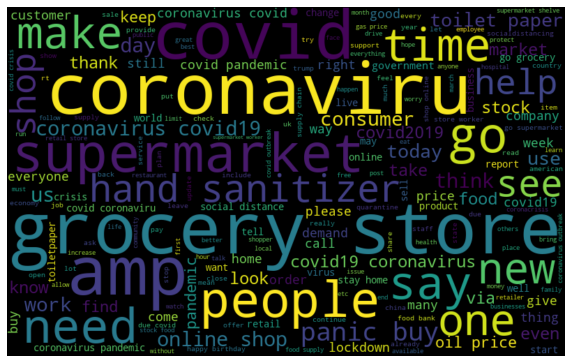

In [30]:
create_cloud(tweets_cleaned["Cleaned_Tweets"])

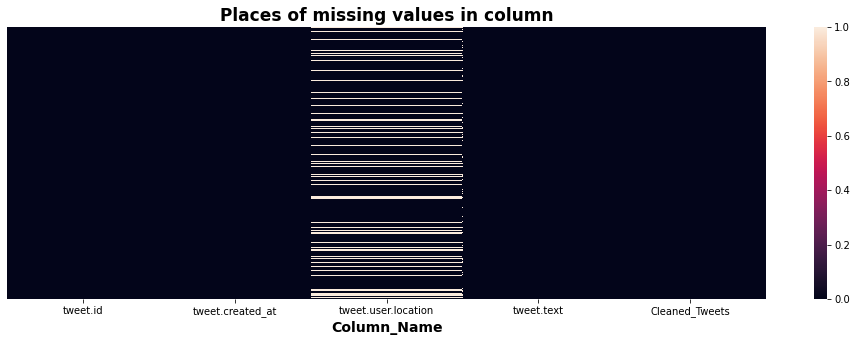

In [31]:
heat_map_null_values(tweets_cleaned)

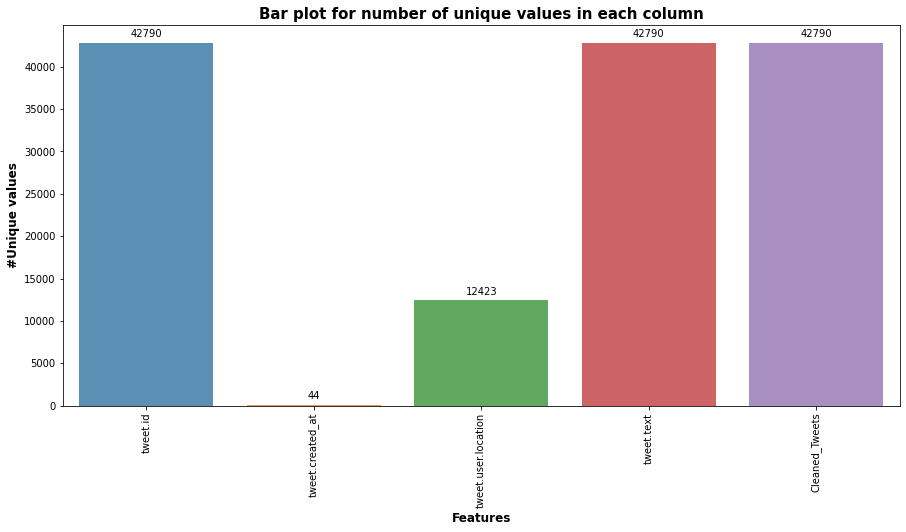

In [32]:
unique_word_count_chart(tweets_cleaned)

# 4. Vader sentiment:
  VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains
  1.   Assign vader score and classify them into a bucket




In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_score(data,tweet_column_name):
  '''
    Input : tweet data set , tweet text column name
    Ouput : None
    Function will add a column- vader_score in the data set
  '''
  data['vader_score'] = data[tweet_column_name].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def bucket_vader_score(data,vader_score_column_name):
  '''
    Input : tweet data set , tweet text column name
    Ouput : None
    Function will add a column-vader sentiment boolean value in the data set
  '''
  data['vader_sentiment_label']= data[vader_score_column_name].map(lambda x:int(1) if x>=0.05 else int(0))

## Function call
get_vader_score(tweets_cleaned,'Cleaned_Tweets')
bucket_vader_score(tweets_cleaned,"vader_score")

In [34]:
#Vader Scores appended to our DataFrame
tweets_cleaned

,tweet.id,tweet.created_at,tweet.user.location,tweet.text,Cleaned_Tweets,vader_score,vader_sentiment_label
0,48751,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,gahan,0.0000,0
1,48752,16-03-2020,UK,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shop account poss adequate supply regular meds order,0.5574,1
2,48753,16-03-2020,Vagabonds,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",coronavirus australia woolworths give elderly disable dedicate shop hours amid covid 19 outbreak,0.0000,0
3,48754,16-03-2020,NaN,"My food stock is not the only one which is empty...\n\n\n\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \n\nStay calm, stay safe.\n\n\n\n#COVI...",food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral,0.3400,1
4,48755,16-03-2020,NaN,"Me, ready to go at supermarket during the #COVID19 outbreak.\n\n\n\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't p...",ready go supermarket covid19 outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement,-0.5574,0
...,...,...,...,...,...,...,...
44947,48743,16-03-2019,"Cincinnati, Ohio",Awwee Heysh making me feel so appreciated 🥺 she really going all out for me to make sure I have a good birthday 😩 ❤️,awwee heysh make feel appreciate really go make sure good birthday,0.8000,1
44949,48745,16-03-2019,Washington D.C.,"RT @BazookaJoeDJ: Remembering American film and theatre actress, singer, and dancer Dorothy Dandridge on her birthday (November 9, 1922 – S…",rt remember american film theatre actress singer dancer dorothy dandridge birthday november 9 1922,0.0000,0
44950,48746,16-03-2019,Israel ??,RT @aliahmed_ppp: Happy birthday to the poet of the east 💓\n#IqbalDay2020 https://t.co/7WPDiGtx9x,rt ppp happy birthday poet east iqbalday2020,0.5719,1
44952,48748,16-03-2019,"Haverford, PA",YOOOO ITS CORYS BIRTHDAY HAPPY BIRTHDAY TO THE ANKLE BREAKER HIMSELF,yoooo corys birthday happy birthday ankle breaker,0.5719,1


## 4.1 A step furthur, we want determine does negative sentiment tweets show signs of depression and anxiety. 


1.   For that purpose we got bag of words related to depression and anxiety and check tweet text against that to flag if tweet showed any signs.




In [35]:
def has_depression(tweets_cleaned):
  '''
    Input : tweet data set
    Output : None
    Function will add a column- has_depression boolean value in the data set
  '''
  dep_list = ['hopeless', 'discouraged','lost interest', 'lonely', 'unhappy', 'sad', 'dissatisfied', 'bored','failure','distraught','guilty','irritation','tired','cry','energy','appetite','depression']
  global dep_dict
  dep_dict = dict()
  
  for i,val in tweets_cleaned.iterrows():
    has_dep = 0
    if(val[5] < 0.0):
      for dep in dep_list:
        if dep in val[4]:
          if dep in dep_dict.keys():
            dep_dict[dep] += 1
          else:
            dep_dict[dep]=1
          has_dep = 1
      tweets_cleaned.at[i,'has_depression'] = has_dep
  tweets_cleaned['has_depression'] = tweets_cleaned['has_depression'].replace(np.nan, 0)

In [36]:
def has_anxiety(tweets_cleaned):
  '''
    Input : tweet data set
    Output : None
    Function will add a column- has_depression boolean value in the data set
  '''
  anx_list = ['fear','nervous','anxiety','lonely','tightness','faint','breath','hear racing','panic','trembling','swallow','flushed','weak','tingling','fidgety','chest pain']
  global anx_dict 
  anx_dict = dict()

  for i,val in tweets_cleaned.iterrows():
    has_anx = 0
    if(val[5] < 0.0):
      for anx in anx_list:
        if anx in val[4]:
          if anx in anx_dict.keys():
            anx_dict[anx] += 1
          else:
            anx_dict[anx] = 1
          has_anx = 1
      tweets_cleaned.at[i,'has_anxiety'] = has_anx
  tweets_cleaned['has_anxiety'] = tweets_cleaned['has_anxiety'].replace(np.nan, 0)

In [37]:
# Function calling
has_depression(tweets_cleaned)
has_anxiety(tweets_cleaned)

In [38]:
# Adding has_depression and has_anxiety classification columns
tweets_cleaned

,tweet.id,tweet.created_at,tweet.user.location,tweet.text,Cleaned_Tweets,vader_score,vader_sentiment_label,has_depression,has_anxiety
0,48751,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,gahan,0.0000,0,0.0,0.0
1,48752,16-03-2020,UK,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shop account poss adequate supply regular meds order,0.5574,1,0.0,0.0
2,48753,16-03-2020,Vagabonds,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",coronavirus australia woolworths give elderly disable dedicate shop hours amid covid 19 outbreak,0.0000,0,0.0,0.0
3,48754,16-03-2020,NaN,"My food stock is not the only one which is empty...\n\n\n\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \n\nStay calm, stay safe.\n\n\n\n#COVI...",food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral,0.3400,1,0.0,0.0
4,48755,16-03-2020,NaN,"Me, ready to go at supermarket during the #COVID19 outbreak.\n\n\n\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't p...",ready go supermarket covid19 outbreak paranoid food stock litteraly empty coronavirus serious thing please panic cause shortage coronavirusfrance restezchezvous stayathome confinement,-0.5574,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
44947,48743,16-03-2019,"Cincinnati, Ohio",Awwee Heysh making me feel so appreciated 🥺 she really going all out for me to make sure I have a good birthday 😩 ❤️,awwee heysh make feel appreciate really go make sure good birthday,0.8000,1,0.0,0.0
44949,48745,16-03-2019,Washington D.C.,"RT @BazookaJoeDJ: Remembering American film and theatre actress, singer, and dancer Dorothy Dandridge on her birthday (November 9, 1922 – S…",rt remember american film theatre actress singer dancer dorothy dandridge birthday november 9 1922,0.0000,0,0.0,0.0
44950,48746,16-03-2019,Israel ??,RT @aliahmed_ppp: Happy birthday to the poet of the east 💓\n#IqbalDay2020 https://t.co/7WPDiGtx9x,rt ppp happy birthday poet east iqbalday2020,0.5719,1,0.0,0.0
44952,48748,16-03-2019,"Haverford, PA",YOOOO ITS CORYS BIRTHDAY HAPPY BIRTHDAY TO THE ANKLE BREAKER HIMSELF,yoooo corys birthday happy birthday ankle breaker,0.5719,1,0.0,0.0


### 4.1.1 Visual analysis of vader sentiment, depression and anxiety score.
      1.   Change in number of negative tweets before and after covid.
      2.   Vader score distribution
      3.   Negative tweet distribution over time
      4.   Propotion of negative tweets related to covid during 2020-2021



Visualizing negative test scores

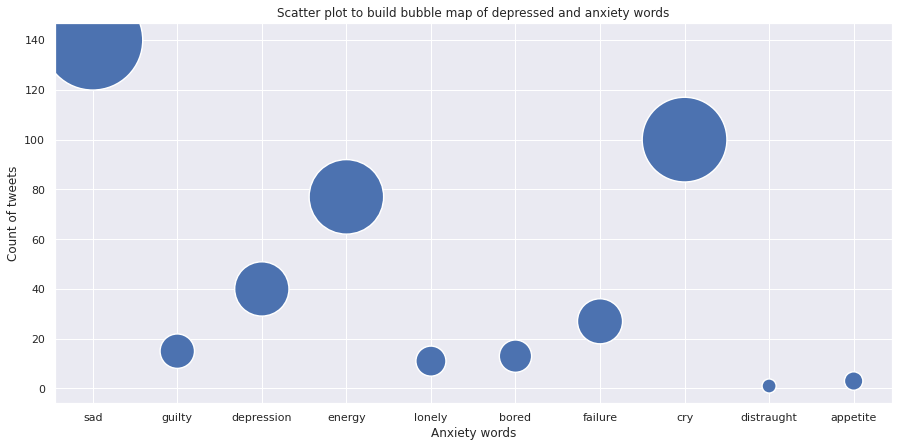

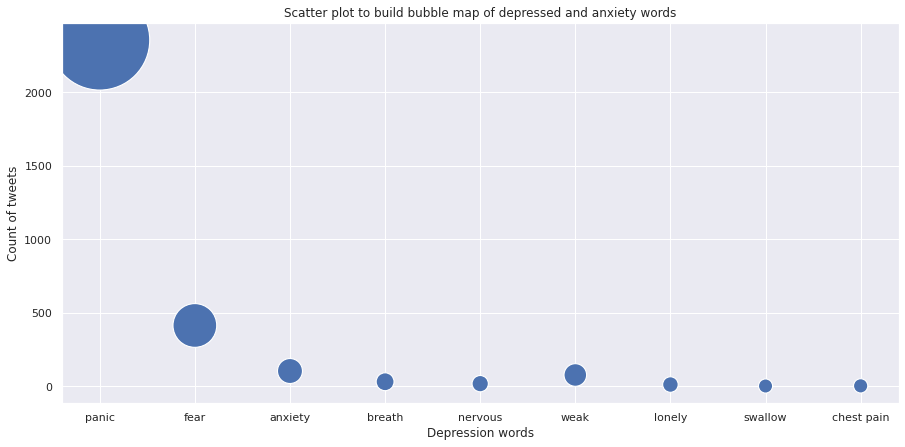

In [99]:
# Scatter plot to build bubble map of depressed and anxiety words
def count_Depression_anxiety_words(dep_dict, anx_dict):
  f, ax = plt.subplots(1,1, figsize=(15,7))
  
  df1 = pd.DataFrame(dep_dict.items(), columns=['word', 'count'])
  sns.scatterplot(data=df1, x="word", y="count",size="count", legend=False, sizes=(200, 10000))
  plt.xlabel("Anxiety words")
  plt.ylabel("Count of tweets")
  plt.title("Scatter plot to build bubble map of depressed and anxiety words")
  plt.show()

  f, ax = plt.subplots(1,1, figsize=(15,7))
  df2 = pd.DataFrame(anx_dict.items(), columns=['word', 'count'])
  sns.scatterplot(data=df2, x="word", y="count",size="count", legend=False, sizes=(200, 10000))
  
  plt.xlabel("Depression words")
  plt.ylabel("Count of tweets")
  plt.title("Scatter plot to build bubble map of depressed and anxiety words")
  plt.show()

count_Depression_anxiety_words(dep_dict, anx_dict)

The above scatter plot of anxiety and depression words versus the count of tweets clearly shows the intensity of burning words like panic, sad, cry, fear etc.

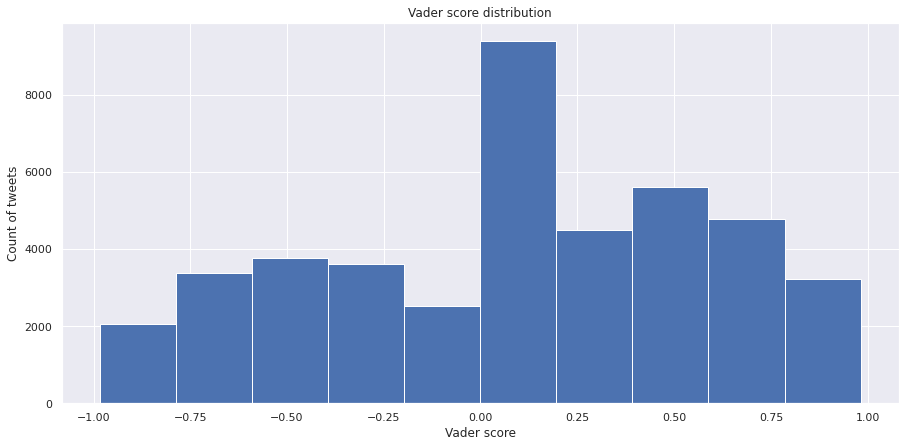

In [106]:
# Vader score distribution
def vader_score_distribution(df):
  fig, ax = plt.subplots(figsize=(15, 7))
  df['vader_score'].hist(ax=ax)
  plt.xlabel("Vader score")
  plt.ylabel("Count of tweets")
  plt.title("Vader score distribution")
  plt.show()

vader_score_distribution(tweets_cleaned)

The inference from above vader score distribution is that more and more tweets near 0.00 giving them a neutral sentiment.

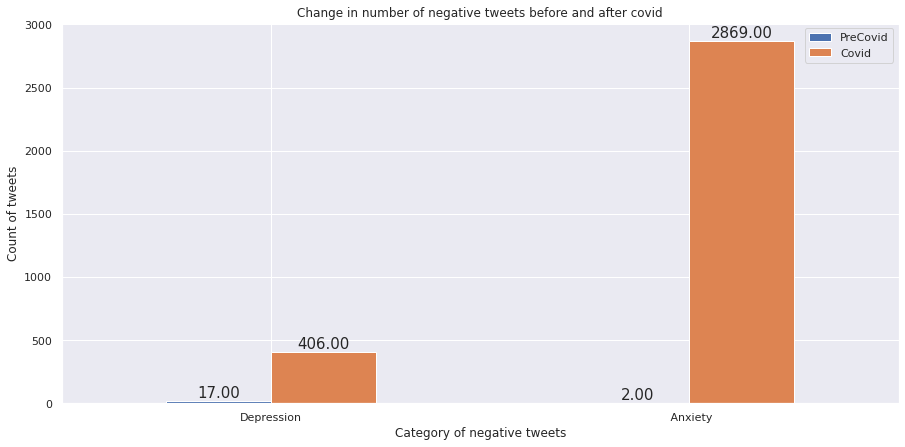

In [113]:
# Change in number of negative tweets before and after covid
def pre_post_covid(df):
  df['tweet.created_at'] =  pd.to_datetime(df['tweet.created_at'])
  has_dep_no_covid = 0
  has_dep_yes_covid = 0
  has_anx_no_covid = 0
  has_anx_yes_covid = 0
  for i,val in df.iterrows():
    if val[1].year < 2020:
      has_dep_no_covid += val[7]
      has_anx_no_covid += val[8]
    else:
      has_dep_yes_covid += val[7]
      has_anx_yes_covid += val[8] 
  PreCovid = [has_dep_no_covid,has_anx_no_covid]
  Covid = [has_dep_yes_covid,has_anx_yes_covid]
  index = ['Depression', ' Anxiety']
  df1 = pd.DataFrame({'PreCovid': PreCovid,'Covid': Covid}, index = index)
  ax = df1.plot.bar(rot=0,figsize=(15, 7))
  for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                    (bar.get_x() + bar.get_width() / 2, 
                      bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')

  plt.xlabel("Category of negative tweets")
  plt.ylabel("Count of tweets")
  plt.title("Change in number of negative tweets before and after covid")
  plt.legend()

pre_post_covid(tweets_cleaned)

Explicitly, depression and anxiety in the above comparison has increased in the humanoid population as a consequence of covid virus.

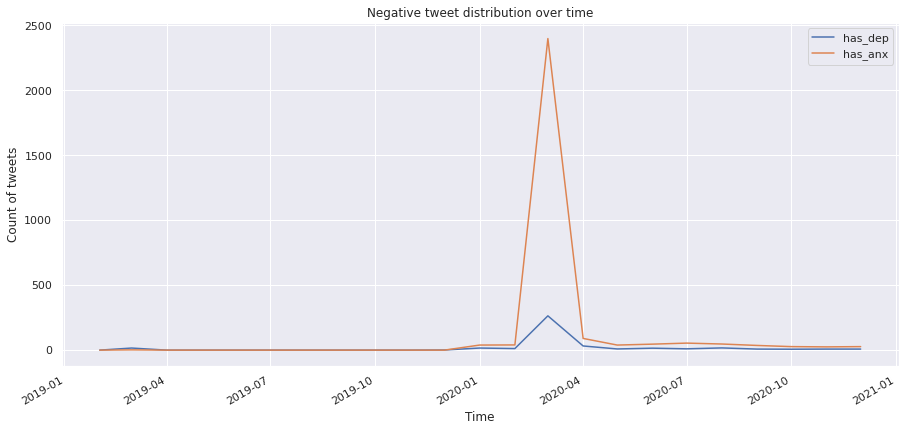

In [115]:
# Negative tweet distribution over time
def time_spent(tweets_cleaned):
  df = pd.DataFrame()
  for i,val in tweets_cleaned.iterrows():
    month = val[1].month
    year =  val[1].year
    df.at[i,'Time'] = str(year)+'-'+str(month)
    df.at[i,'has_dep'] = val[7]
    df.at[i,'has_anx'] = val[8]
  
  df['Time'] =  pd.to_datetime(df['Time'],format = '%Y-%m')
  ax = df.groupby(by=['Time'])['has_dep','has_anx'].sum()
  ax.plot(figsize=(15, 7))
  plt.xlabel("Time")
  plt.ylabel("Count of tweets")
  plt.title("Negative tweet distribution over time")
  plt.legend()

time_spent(tweets_cleaned)

The above time series chart demonstrates that during the months of March and April in 2020, people panicked (from scatter plot, panic word was used more than 2000 times in tweets) and slowly people started settling down and have accepted the new norm of life with social distancing, masks, hand sanitizing etc.

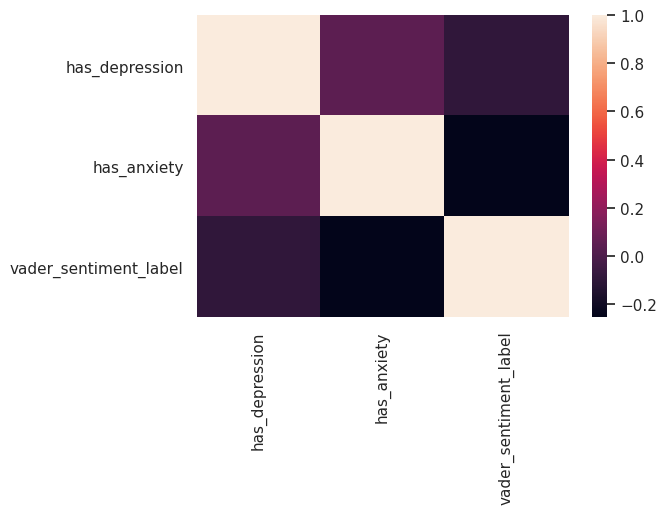

In [57]:
# Heatmap for categorical variables
def heatmap_depression_anxiety(df):
  sns.set_theme()
  ax = sns.heatmap(df.corr())

heatmap_depression_anxiety(tweets_cleaned[['has_depression','has_anxiety','vader_sentiment_label']])

From the above correlation graph, depression tweets are more correlated with vader sentiments than the anxiety ones. Overall, there doesn’t seem to be a high correlation between these factors.

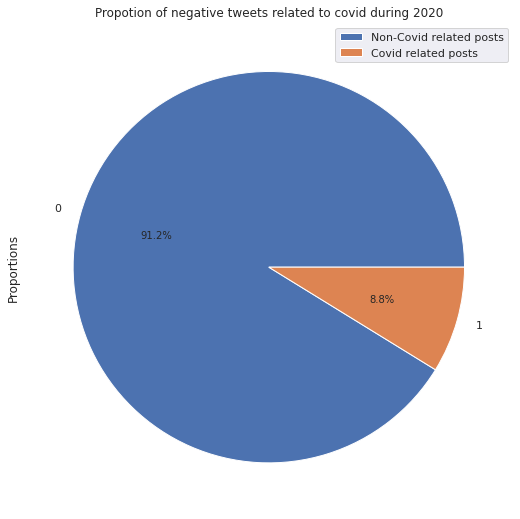

In [132]:
# Propotion of negative tweets related to covid during 2020
def check_covid_words(df):
  covid_words = {"COVID2019","COVID19","pandemic","Coronavirus","Social distancing","Flatten the curve", "covid-19", "CORONA", "StayHomeStaySafe", "StayHome", "CovidPandemic", "Lockdown", "Qurantine", "Outbreak"}
  cov_count = 0
  temp = df[df["vader_score"] < 0 ]
  for i,val in temp.iterrows():
    for cov in covid_words:
      if cov in val[4]:
        cov_count += 1
        break

  non_cov_count = len(temp) - cov_count
  df1 = pd.DataFrame({'Post Counts':['Non-Covid related posts', 'Covid related posts'], 'Proportions':[non_cov_count,cov_count]})
  ax = df1.plot.pie(x='Post Counts', y='Proportions',figsize=(17, 9), autopct='%1.1f%%')
  plt.title("Propotion of negative tweets related to covid during 2020")
  plt.legend(['Non-Covid related posts', 'Covid related posts'],loc = "upper right")

check_covid_words(tweets_cleaned)

Even during COVID times, only 8.8% tweets were covid related out of the entire tweets. That certainly tells us that although covid became an integral part of peoples lives, people were focusing on other areas of living like NBA, politics etc

# 5. Classification Models:
  1.   Decision Tree
  2.   SVM
  3.   Logistic regression
  4.   Random forest



In [48]:
def get_svd(X_train_vectorized,X_test_vectorized):
  svd = TruncatedSVD(n_components=300, random_state=42)
    #normalization
  X_train_vectorized = preprocessing.normalize(X_train_vectorized, norm='l2')
  X_test_vectorized = preprocessing.normalize(X_test_vectorized, norm='l2')
    #svd
  X_train_vectorized_svd = svd.fit_transform(X_train_vectorized.toarray())
  X_test_vectorized_svd = svd.transform(X_test_vectorized.toarray())
  return X_train_vectorized_svd,X_test_vectorized_svd

def hyperpara_optim(parameters, clf):  
	grid = GridSearchCV(clf,param_grid=parameters,cv=6)
	grid.fit(X_train_vectorized,y_train)
	print('Best parameters:',grid.best_params_,'Best scores:', grid.best_score_)  
	return grid.best_params_

def split_data(df):
	X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Tweets'],df['vader_sentiment_label'], random_state=0)
	vect = TfidfVectorizer(max_features=1000).fit(X_train)
	X_train_vectorized = vect.transform(X_train)
	X_test_vectorized = vect.transform(X_test)
	X_train_vectorized_svd,X_test_vectorized_svd = get_svd(X_train_vectorized,X_test_vectorized)
	return X_train_vectorized_svd,X_test_vectorized_svd,y_train,y_test

def get_confusion_matrix(y_test,y_pred):
  labels = ['Negative', 'Positive']
  cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),columns=["Predicted Negative", "Predicted Positive"],index=["Actual Negative","Actual Positive"])
  cm_df = pd.DataFrame(cm)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax,fmt='g')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  return cm_df

def get_cls_cm(y_test, y_pred,X_test_vectorized,model):
	#check accuracy
  target_names=['0','1']
  print("-----------Classification Report----------")
  cls_report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
  cls_report_df = pd.DataFrame(cls_report).transpose()
  print(cls_report_df)
  # make the confusion matrix 
  print("-----------Confusion Matrix----------")
  cm_df = get_confusion_matrix(y_test,y_pred)
  return cls_report_df,cm_df


def get_decision_tree(best_params_dt,X_train_vectorized,X_test_vectorized,y_train,y_test):
	
	clf_dt = DecisionTreeClassifier(max_depth=best_params_dt['max_depth'],min_samples_leaf=best_params_dt['min_samples_leaf'])
	clf_dt.fit(X_train_vectorized,y_train)
	y_pred = clf_dt.predict(X_test_vectorized)
	print('Train score：', clf_dt.score(X_train_vectorized,y_train),'Test score',clf_dt.score(X_test_vectorized,y_test))
	cls_report,cm = get_cls_cm(y_test, y_pred,X_test_vectorized,clf_dt)
	return cls_report,cm,clf_dt

def get_random_forest(best_params_rf,X_train_vectorized,X_test_vectorized,y_train,y_test):
	
	clf_rf = RandomForestClassifier(max_depth=best_params_rf['max_depth'],min_samples_leaf=best_params_rf['min_samples_leaf'])
	clf_rf.fit(X_train_vectorized,y_train)
	y_pred = clf_rf.predict(X_test_vectorized)
	print('Train score：', clf_rf.score(X_train_vectorized,y_train),'Test score',clf_rf.score(X_test_vectorized,y_test))
	cls_report,cm = get_cls_cm(y_test, y_pred,X_test_vectorized,clf_rf)
	return cls_report,cm,clf_rf

def get_svm(best_params_svm,X_train_vectorized,X_test_vectorized,y_train,y_test):
	
	clfrSVM = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=True))
	clf_svm = make_pipeline(StandardScaler(), SVC(C=best_params_svm['C'], gamma=best_params_svm['gamma'], kernel=best_params_svm['kernel']))
	clf_svm.fit(X_train_vectorized,y_train)
	y_pred = clf_svm.predict(X_test_vectorized)
	print('Train score：', clf_svm.score(X_train_vectorized,y_train),'Test score',clf_svm.score(X_test_vectorized,y_test))
	cls_report,cm = get_cls_cm(y_test, y_pred,X_test_vectorized,clf_svm)
	return cls_report,cm,clf_svm

def get_logistic_regression(best_params_lr,X_train_vectorized,X_test_vectorized,y_train,y_test):
  clf_lr = LogisticRegression(C=best_params_lr['C']).fit(X_train_vectorized, y_train)
    # predicting test set results 
  y_pred = clf_lr.predict(X_test_vectorized)
  print('Train score：', clf_lr.score(X_train_vectorized,y_train),'Test score',clf_lr.score(X_test_vectorized,y_test))
  cls_report,cm = get_cls_cm(y_test, y_pred,X_test_vectorized,clf_lr)
  return cls_report,cm,clf_lr

In [47]:
#get input value for models
X_train_vectorized,X_test_vectorized,y_train,y_test = split_data(tweets_cleaned)

Start processing Logistic Regression
Best parameters: {'C': 1} Best scores: 0.7782623129914888
Train score： 0.7849931447089618 Test score 0.7799588708169751
-----------Classification Report----------
              precision    recall  f1-score       support
0              0.763374  0.848821  0.803833   5682.000000
1              0.803881  0.701954  0.749468   5016.000000
accuracy       0.779959  0.779959  0.779959      0.779959
macro avg      0.783628  0.775387  0.776651  10698.000000
weighted avg   0.782367  0.779959  0.778343  10698.000000
-----------Confusion Matrix----------


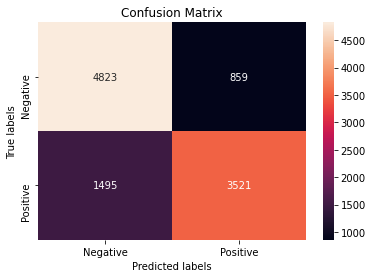

In [52]:
"""Logistic Regression"""
print('Start processing Logistic Regression')
parameters_lr = {'C': [0.1, 1]}
best_params_lr = hyperpara_optim(parameters_lr,LogisticRegression())

cls_report_lr,cm_lr,clf_lr = get_logistic_regression(best_params_lr,X_train_vectorized,X_test_vectorized,y_train,y_test)

Start processing Decision Tree
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1} Best scores: 0.6259198274571066
Train score： 0.6301570484856039 Test score 0.6247896803140774
-----------Classification Report----------
              precision    recall  f1-score      support
0              0.596909  0.904083  0.719065   5682.00000
1              0.739484  0.308413  0.435284   5016.00000
accuracy       0.624790  0.624790  0.624790      0.62479
macro avg      0.668196  0.606248  0.577175  10698.00000
weighted avg   0.663758  0.624790  0.586008  10698.00000
-----------Confusion Matrix----------


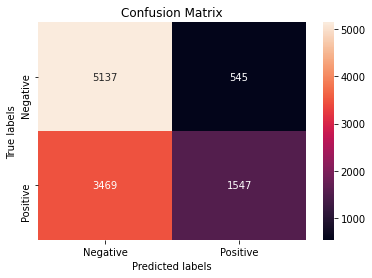

In [53]:
#get input value for models

"""Decision Tree"""
print('Start processing Decision Tree')
parameters_dt = { 'max_depth': [2, 5], 'min_samples_leaf': [1, 5]}
best_params_dt = hyperpara_optim(parameters_dt,DecisionTreeClassifier())

cls_report_dt,cm_dt,clf_dt = get_decision_tree(best_params_dt,X_train_vectorized,X_test_vectorized,y_train,y_test)


Start processing SVM
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} Best scores: 0.7059390424696267
Train score： 0.9382088994141842 Test score 0.7931389044681249
-----------Classification Report----------
              precision    recall  f1-score       support
0              0.782814  0.844949  0.812696   5682.000000
1              0.807010  0.734450  0.769022   5016.000000
accuracy       0.793139  0.793139  0.793139      0.793139
macro avg      0.794912  0.789699  0.790859  10698.000000
weighted avg   0.794159  0.793139  0.792218  10698.000000
-----------Confusion Matrix----------


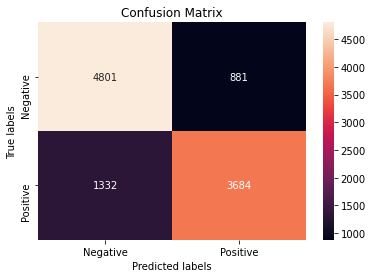

In [51]:
#get input value for models

"""SVM"""
print('Start processing SVM')
parameters_svm = {'C': [10], 'gamma': [0.001], 'kernel': ['rbf']}
svc = svm.SVC()
best_params_svm = hyperpara_optim(parameters_svm,svc)

cls_report_svm,cm_svm,clf_svm = get_svm(best_params_svm,X_train_vectorized,X_test_vectorized,y_train,y_test)


Start processing Random Forest
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1} Best scores: 0.6860275728473191
Train score： 0.7024492085254892 Test score 0.685548700691718
-----------Classification Report----------
              precision    recall  f1-score       support
0              0.647756  0.894227  0.751294   5682.000000
1              0.789418  0.449163  0.572554   5016.000000
accuracy       0.685549  0.685549  0.685549      0.685549
macro avg      0.718587  0.671695  0.661924  10698.000000
weighted avg   0.714178  0.685549  0.667488  10698.000000
-----------Confusion Matrix----------


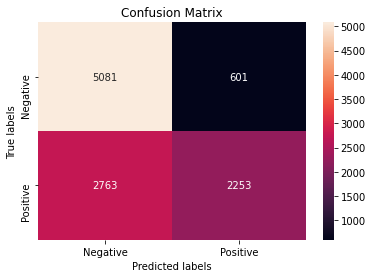

In [50]:
#get input value for models

"""Random Forest"""
print('Start processing Random Forest')
parameters_rf = { 'max_depth': [2, 5], 'min_samples_leaf': [1, 5]}
best_params_rf = hyperpara_optim(parameters_rf,RandomForestClassifier())

cls_report_rf,cm_rf,clf_rf= get_random_forest(best_params_rf,X_train_vectorized,X_test_vectorized,y_train,y_test)


# 7. Model analysis :
1.   AUC curve comparision.




AUC for Logistic Reg = 0.854
AUC for Decision Tree = 0.667
AUC for Random Forest = 0.762
AUC for SVM = 0.871


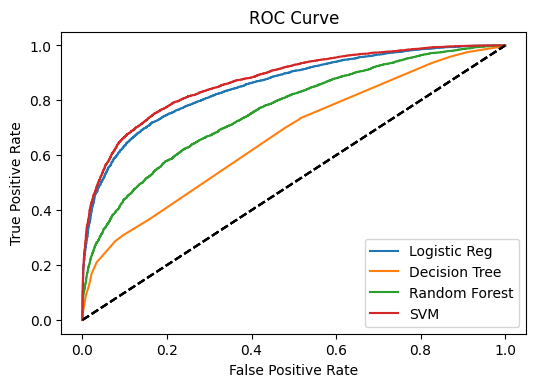

In [54]:
def get_model_roc(models, Xs_test, names, Y_test):
    plt.rcParams['figure.dpi'] = 100
    for i in range(len(models)):
        model = models[i]
        X_test = Xs_test[i]
        name = names[i]
        if i == 3 :
          probs = clf_svm.decision_function(X_test_vectorized)
        else:
          probs = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs)
        plt.plot(fpr, tpr, label=name)
        plt.plot([0, 1], [0, 1], linestyle='dashed', color='black')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        print ("AUC for {0} = {1:.3f}".format(name, metrics.roc_auc_score(Y_test, probs)))
    plt.legend()
    plt.show()

get_model_roc([clf_lr,clf_dt,clf_rf,clf_svm], [X_test_vectorized,X_test_vectorized,X_test_vectorized,X_test_vectorized], ['Logistic Reg','Decision Tree','Random Forest','SVM'], y_test)

Out of Logistic regression, decision tree, random forest and SVM the winner model has shown itself to be Support Vector Machines. Hence we can conclude that this dataset has a clear margin of separation in high dimension spaces.


## **Insights and Conclusion:**



Let us do a quick exercise, type “COVID (and a space)” on google. 

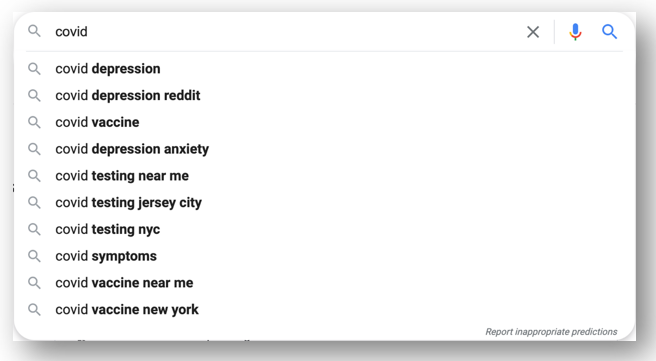

This quick internet search for COVID confirms our hypothesis. 3 out of top 5
search results are based on depression and anxiety due to the pandemic. 

Similar trends in mental health analysis from tweets by different users during 2019-2020 can be seen as well.


Responding to the debrief of our problem statements:
1. Yes, with certainty and reliance, there is a rise in mental health issues among large inhabitant of this world.
2. 7.7% percent users from our dataset might be suffering from depression and anxiety, this can be calculated from the bar graph, “Change in number of tweets before and after COVID”
      (Calculation: Depression & Anxiety tweets: 3294, Total number of tweets: 42790, Calculated percent = 7.7%)
3. Yes, more people are anxious than depressed as we saw a large number of populace using the hashtag panic in their tweets.
4. From our model analysis, using SVM as the machine learning algorithm we can best predict whether the person is depressed, anxious or neither with an approximately 80% chance.

*Note: This project operates on unsupervised learning algorithm. Vader score has been calculated to categorize the tweet as negative, positive or neutral.*


## **Challenges** 
1. Data extraction from twitter is arduous and complicated.
2. The location feature from the dataset was of little to no importance in data analysis or visualization because of lack of consistency. Tweets are located as state/country/city/area, example this becomes difficult to manage or group areas of a country.
3. Due to Hyperparameter optimization, the code takes considerable amount of time to run.
4. Although SVM is our winner model, it took the longest to run with respect to other simpler models like logistic regression and decision tree.
5. The data cleaning part was intense as we were dealing with textual data which had a lot of punctuations, abbreviations and stop words.
